# Exploratory Data Analysis

In [1]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
import plotly.express as px
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv('../Data/processed_data.csv')

df.head()

,REF,Company,Company_Location,Year_Reviewed,Bean_Origin,Cocoa_Percent,Characteristics,Rating,S_Bean_Origin,Number_Ingredients,Ingredient_B,Ingredient_C,Ingredient_L,Ingredient_S,Ingredient_S*,Ingredient_Sa,Ingredient_V
0,2454,5150,U.S.A.,2019,Tanzania,76.0,"rich cocoa, fatty, bready",3.25,Kokoa Kamili,3,1,1,0,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"cocoa, vegetal, savory",3.50,Zorzal,3,1,1,0,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,76.0,"cocoa, blackberry, full body",3.75,Bejofo Estate,3,1,1,0,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,68.0,"chewy, off, rubbery",3.00,Matasawalevu,3,1,1,0,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,72.0,"fatty, earthy, moss, nutty,chalky",3.00,Sur del Lago,3,1,1,0,1,0,0,0


Since a lot of the research involves comparing the results between countries, I am going to get the geodata for all countries as well. For this I'm using GeoPandas.

In [3]:
# Import geodata
geodata = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geodata

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### 1. Which country produces the best bean? (Average rating by country of origin)

In [4]:
av_rating_origin_df = df.groupby('Bean_Origin')[['Rating']].mean().reset_index().rename(columns={'Rating':'Average_Rating'})
av_rating_origin_df.sort_values(by=['Average_Rating'], inplace=True, ascending=False)

print('TOP 10 COUNTRIES\n{}\n\n'.format(av_rating_origin_df.head(10)))
print('BOTTOM 10 COUNTRIES\n{}'.format(av_rating_origin_df.tail(10)))

TOP 10 COUNTRIES
            Bean_Origin  Average_Rating
42  Sao Tome & Principe        3.500000
7                 China        3.500000
44      Solomon Islands        3.450000
9                 Congo        3.318182
53             Thailand        3.300000
61              Vietnam        3.295139
11                 Cuba        3.291667
35     Papua New Guinea        3.280612
28           Madagascar        3.273669
21                Haiti        3.266667


BOTTOM 10 COUNTRIES
              Bean_Origin  Average_Rating
49                Sumatra        3.000000
33                Nigeria        2.875000
51                 Taiwan        2.875000
45              Sri Lanka        2.875000
25            Ivory Coast        2.833333
43           Sierra Leone        2.750000
38               Principe        2.750000
30             Martinique        2.750000
47  St.Vincent-Grenadines        2.750000
39            Puerto Rico        2.714286


**The country that produces the best bean would be Sao Tome & Principe and worst beans come from Puerto Rico.**

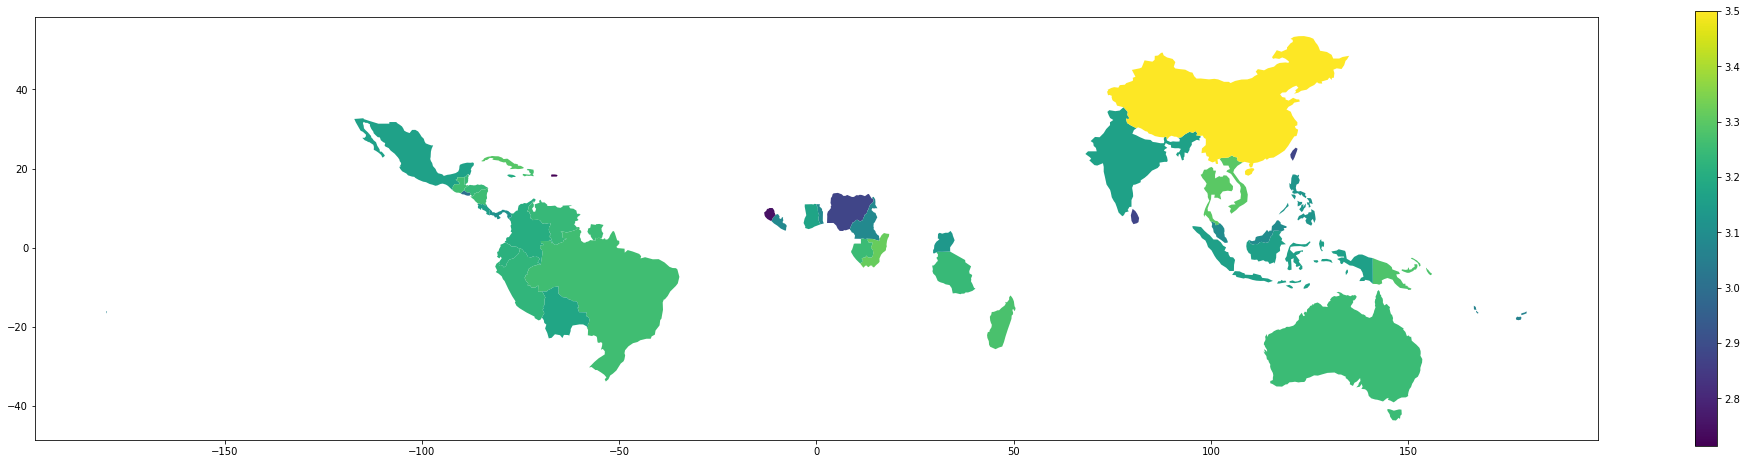

In [5]:
# Rename the country column to merge it later
renamed_av_rating_origin_df = av_rating_origin_df.rename(columns={'Bean_Origin':'name'})

# Merge the dataframe with the geodata
map = pd.merge(geodata, renamed_av_rating_origin_df, how='inner', on='name')

# Display the choropleth
ratings_map = map.plot(column='Average_Rating', legend=True, legend_kwds={'shrink': 0.4}, figsize=(35, 20), missing_kwds={"color": "purple"})

From the map I can see that according to the origin of the beans, chocolate bars are:
- best rated: north-east Europe
- medium rated: south of the ecuatorial
- worst rated: closest to the ecuatorial

However, the country of bean origin doesn't seem to be the most accurate way to measure the quality of the chocolate bars.

### 2. Which countries produce the highest-rated bars? (Average rating by country of company)

In [81]:
av_rating_company_df = df.groupby('Company_Location')[['Rating']].mean().reset_index().rename(columns={'Rating':'Average_Rating'})
av_rating_company_df.sort_values(by=['Average_Rating'], inplace=True, ascending=False)

print('TOP 10 COUNTRIES\n{}\n\n'.format(av_rating_company_df.head(10)))
print('BOTTOM 10 COUNTRIES\n{}'.format(av_rating_company_df.tail(10)))

TOP 10 COUNTRIES
   Company_Location  Average_Rating
8             Chile        3.750000
46         Sao Tome        3.500000
42           Poland        3.500000
1         Argentina        3.500000
60           U.A.E.        3.400000
2         Australia        3.367647
65          Vietnam        3.359375
22        Guatemala        3.350000
12          Denmark        3.338710
39           Norway        3.333333


BOTTOM 10 COUNTRIES
         Company_Location  Average_Rating
54  St.Vincent-Grenadines           2.750
53              St. Lucia           2.750
50           South Africa           2.750
43               Portugal           2.750
34             Martinique           2.750
63                Vanuatu           2.750
20                  Ghana           2.750
66                  Wales           2.750
26                  India           2.625
44            Puerto Rico           2.500


**The highest rated chocolate bars come from companies based in Chile and the worst rated come from companies based in Puerto Rico.**

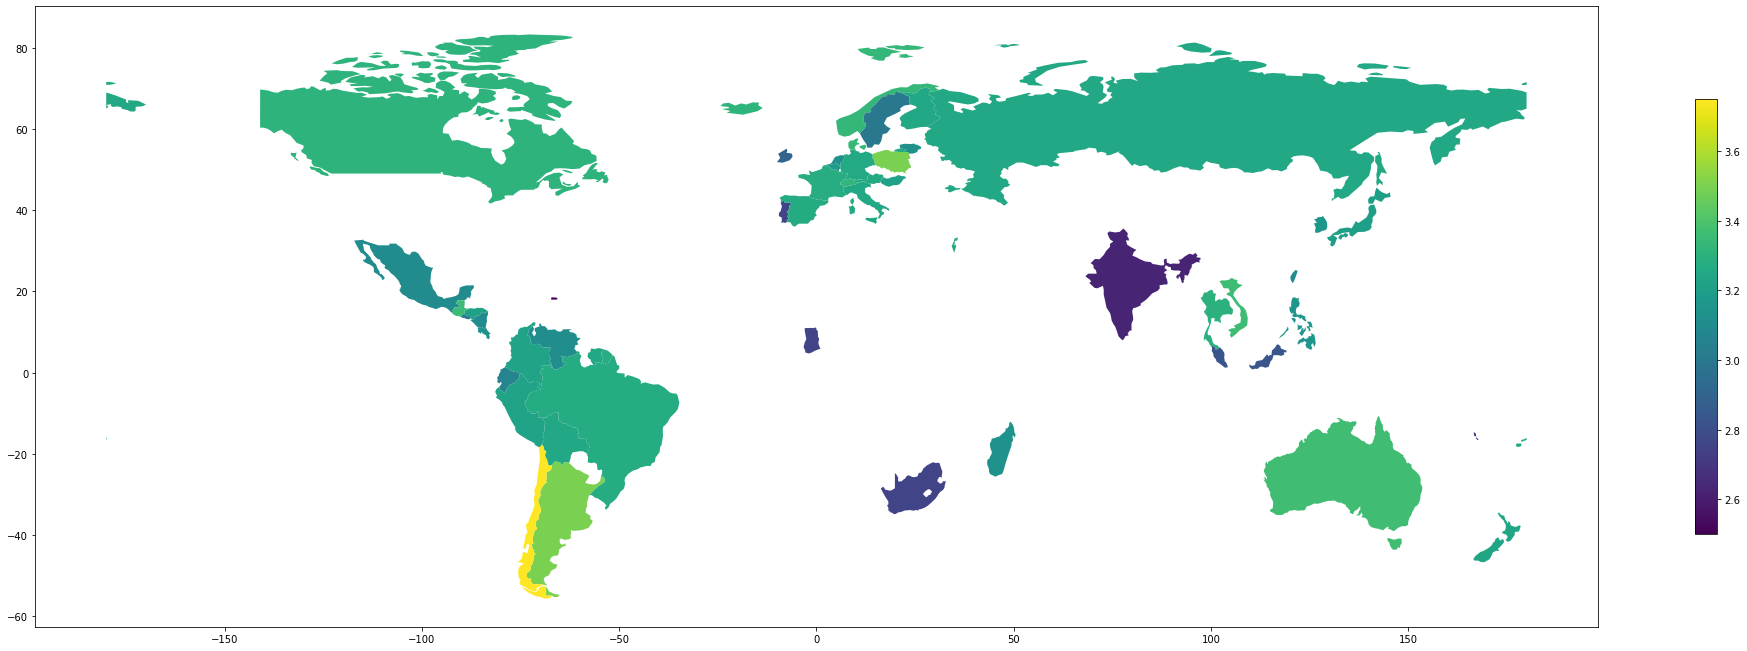

In [92]:
# Rename the country column to merge it later
renamed_av_rating_company_df = av_rating_company_df.rename(columns={'Company_Location':'name'})

# Merge the dataframe with the geodata
map = pd.merge(geodata, renamed_av_rating_company_df, how='inner', on='name')

# Display the choropleth
ratings_map = map.plot(column='Average_Rating', legend=True, legend_kwds={'shrink': 0.4}, figsize=(35, 20), missing_kwds={"color": "purple"})

From the map I can tell that the best rated chocolate bars come from the south of Latin America and east Europe.

### 3. How much cocoa percentage is the best rated? (Average cocoa content per chocolate bar)

Another variable to consider as a possible determining factor on the ratings of the chocolate bars is the amount of cocoa.

In [85]:
# Get the dataframe with the cocoa percentage and the rating
rating_cocoa_df = df[['Rating', 'Cocoa_Percent']]

rating_cocoa_df

,Rating,Cocoa_Percent
0,3.25,76.0
1,3.50,76.0
2,3.75,76.0
3,3.00,68.0
4,3.00,72.0
...,...,...
2428,2.75,80.0
2429,3.75,75.0
2430,3.00,75.0
2431,3.25,70.0


Following the same approach as before I also want see the correlation between the cocoa percentage and the ratings.

In [86]:
correlation_matrix = rating_cocoa_df.corr()
round(correlation_matrix,2)

,Rating,Cocoa_Percent
Rating,1.00,-0.08
Cocoa_Percent,-0.08,1.00


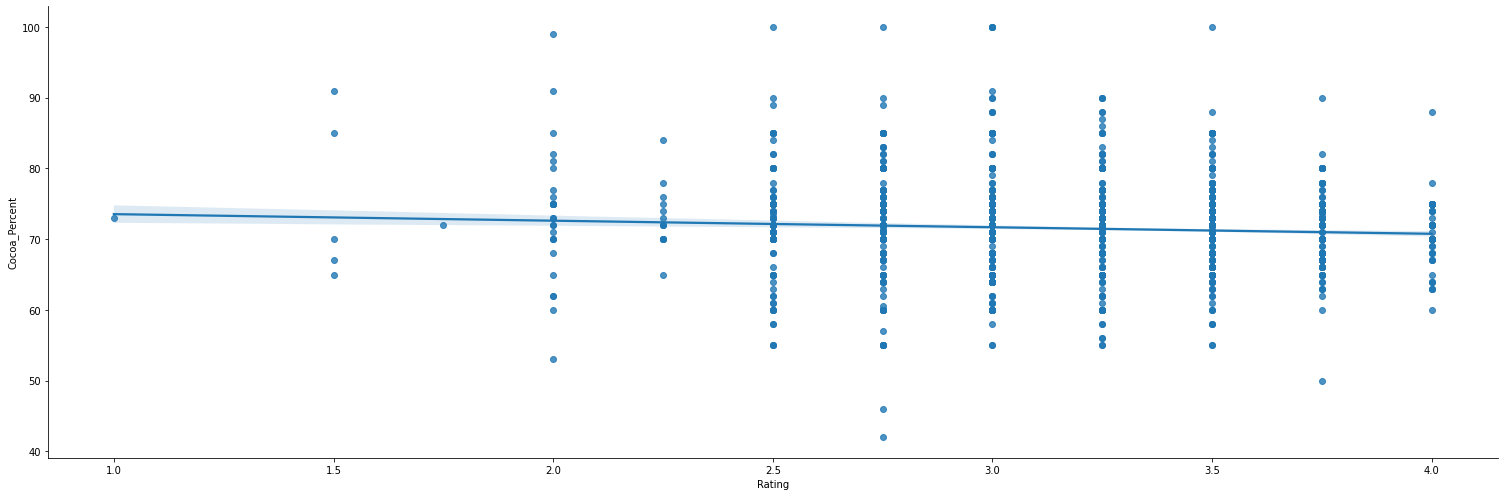

In [87]:
sns.lmplot(x='Rating', y='Cocoa_Percent', data=rating_cocoa_df, height=7, aspect=3)

After displaying this results, I can tell that the average cocoa percent is even less relevant to the ratings than the number of reviews, with a negative correlation of only 8.08.

In [71]:
print('COCOA CONTENT FOR BARS WITH RATING HIGHER THAN 3.5\n')
print('Average: {}'.format(df[df.Rating >= 3.5]['Cocoa_Percent'].mean()))
print('Mode: {}'.format(df[df.Rating >= 3.5]['Cocoa_Percent'].mode()))
print('Median: {}'.format(df[df.Rating >= 3.5]['Cocoa_Percent'].median()))

COCOA CONTENT FOR BARS WITH RATING HIGHER THAN 3.5

Average: 71.1264367816092
Mode: 0    70.0
Name: Cocoa_Percent, dtype: float64
Median: 70.0


**If we consider more than 3.5 as the best range of ratings, then the best quantity of cocoa percent is a value between 70 and 71.**

To be more certain, I'm going to get the average ratings of chocolate bars with a cocoa percent in the range of 70 and 71.

In [69]:
print('RATINGS FOR BARS WITH COCOA CONTENT BETWEEN 70 AND 71\n')
print('Average: {}'.format(df[(df.Cocoa_Percent >= 70) & (df.Cocoa_Percent <= 71)]['Rating'].mean()))
print('Mode: {}'.format(df[(df.Cocoa_Percent >= 70) & (df.Cocoa_Percent <= 71)]['Rating'].mode()))
print('Median: {}'.format(df[(df.Cocoa_Percent >= 70) & (df.Cocoa_Percent <= 71)]['Rating'].median()))

RATINGS FOR BARS WITH COCOA CONTENT BETWEEN 70 AND 71

Average: 3.266808712121212
Mode: 0    3.5
Name: Rating, dtype: float64
Median: 3.25


There are a wide range of ratings for chocolate bars with cocoa percent between 70 and 71, however out of this wide range the most repeated value (mode) is 3.5. This means that even though the most repeated rating for 70-71% cocoa, there are a lot of low ratings for this cocoa percentage range so it is still not a defining feature.

### 4. Does lecithin (L) affect the flavour? (Average rating of bars containing lecithin)

The research indicates that some consumers want to avoid bars with lecithin so I'm going to compare the average rating of bars with and without lecithin (L in the ingredients).

In [76]:
# Get the dataframe with the check on whether the chocolate bar contains Lecithin and its rating
rating_L_df = df.groupby('Ingredient_L')[['Rating']].mean()

rating_L_df

,Rating
Ingredient_L,
0,3.226466
1,3.152352


**The difference of the average rating of chocolate bars with and without lecithin is of 0.07, which doesn't seem to be that representative.**

To be sure, I'm going to check correlation matrix of the chocolate bars with and without other ingredients.

<AxesSubplot:>

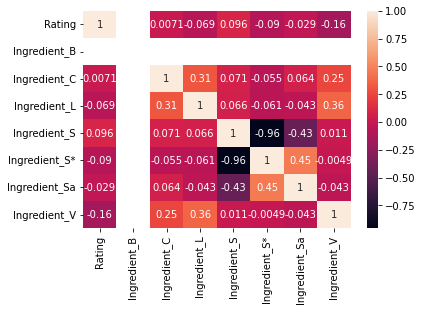

In [80]:
rating_ingredients_df = df[['Rating', 'Ingredient_B',	'Ingredient_C',	'Ingredient_L',	'Ingredient_S',	'Ingredient_S*',	'Ingredient_Sa',	'Ingredient_V']]
correlation_matrix = rating_ingredients_df.corr()
round(correlation_matrix, 2)
sns.heatmap(correlation_matrix, annot=True)

From this correlation matrix, I can see that there's a negative correlation of 0.16 between ingredient V and the rating which is the biggest correlation between the ingredients and the ratings.

This means that ratings drop considerably if the chocolate bar contains ingredient V.

## Conclusion: The secret to the best chocolate bar

With this research I wa able to find that the best chocolate bar would probably have the following characteristics:
- Country of bean origin: Sao Tome & Principe 
- Country of company origin: Chile
- Cocoa percent: 70%
- Don't contain: V

#### Resources
- Geo Json: https://datahub.io/core/geo-countries